# EL desafio del cubano: "Mantener una alimentacion saludable":  

## Introduccion


Una [alimentacion saludable](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) ayuda a protegernos de la malnutrición en todas sus formas, así como de las enfermedades no transmisibles, entre ellas la diabetes, las cardiopatías, los accidentes cerebrovasculares y el cáncer.
Para una alimentacion saludable se basa en consumir los nutrientes que necesita el cuerpo. La composición exacta varía según las características individuales de cada persona (edad, sexo, estilo de vida y grado de actividad física). Sin embargo, los principios básicos de una alimentación saludable siguen siendo los mismos para todos.

Tipos de nutrientes
1) Macronutrientes
2) Micronutrientes

Los [macronutrientes](https://www.fundacionparalasalud.org/infantil/202/macronutrientes) son aquellas sustancias necesarias en grandes cantidades (proteina, grasas y carbohidrato) que proporcionan energía al organismo para un buen funcionamiento, para reparar y construir estructuras orgánicas y para promover el crecimiento. Los [micronutrientes](https://www.paho.org/es/temas/micronutrientes) son pequeñas cantidades de vitaminas y minerales requeridos por el cuerpo para la mayoría de las funciones celulares.

En este proyecto, se analizará el costo económico de los macronutrientes presentes en alimentos de consumo cotidiano en Cuba.



In [2]:
import importlib
import json
import src.graficos as gr
import src.funciones as fn

### Requisitos para una dieta saludable

Consumir las proporciones correctas de macronutrientes diarios es clave para una alimentación saludable, por lo que en esta sección se presentará un gráfico de pastel que muestre visualmente qué porcentaje aproximado de la energía diaria, entendida como el total de kilocalorías consumidas en el día, debería provenir de carbohidratos, grasas y proteínas en la dieta de un adulto. Esta explicación es una adaptación al contexto cubano de los conceptos sobre macronutrientes por [OMS/FON](https://iris.who.int/server/api/core/bitstreams/f06e1673-3689-4cb1-8a37-762a3e9c5360/content)




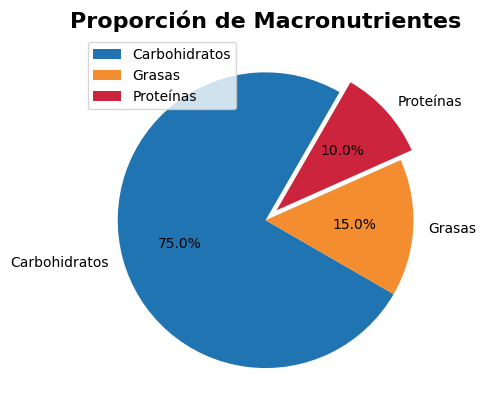

In [6]:
gr.proporcion_macronutrientes()

En esta sección el usuario puede ingresar la cantidad de gramos de kilocalorías necesita, y el programa calcula automáticamente cuántos gramos de proteínas, grasas y carbohidratos debe consumir diario para mantener el balance de nutrientes recomendado.


In [5]:
resultado = fn.calcular_macronutrientes(2600)
for clave, valor in resultado.items(): # para mostrar los resultados de forma mas clara
    print(f"{clave}: {valor} g")


carbohidratos_g: 481.0 g
grasas_g: 43.33 g
proteinas_g: 65.0 g



[Salario medio en La Habana](https://www.onei.gob.cu/sites/default/files/publicaciones/2025-04/salario-medio-en-cifras-2024-edicion-2025.pdf) 6449

Con el salario medio de un cubano, cuales son los alimentos que puede comprar

fuente principal de proteina frijoles negros (proteina: 6.56cup, )
fuente principal de grasas: muslo de pollo (grasas 12.85 cup) 
carboidratos: arroz 1.14cup



In [ ]:
fn.ordenar_costos(proteina)


In [ ]:
prot = fn.costo_promedio_nutr(proteina)
car = fn.costo_promedio_nutr(carbhoidrato)
gra = costo_promedio_nutr(grasa)

gr.barra_costo_promedio_nutr(productos, precios_carb, precios_gras, precios_prot)


NameError: name 'proteina' is not defined